# 21點樸克牌(Blackjack)的Policy Evaluation策略評估

In [1]:
# 匯入zipfile模組，用來處理.zip壓縮檔案
import zipfile

# 使用with敘述開啟lib.zip壓縮檔案，確保使用完自動關閉
with zipfile.ZipFile("lib.zip") as zf:
    # 使用infolist()取得壓縮檔中所有檔案的資訊(ZipInfo物件)
    for info in zf.infolist():
    
        # 因為某些zip壓縮檔的檔名是以cp437編碼(特別是從Windows系統壓縮的)
        # 所以這裡先將原本的檔名(字串)用cp437編碼為bytes，再用utf-8解碼為正確的字串
        # 這樣可以正確顯示中文或特殊字元的檔名
        print(info.filename.encode('cp437').decode('utf-8'))

        # 將目前這個檔案(info)解壓縮到target_folder資料夾中
        zf.extract(info, "target_folder")

lib/__init__.py
lib/__pycache__/
lib/__pycache__/__init__.cpython-38.pyc
lib/__pycache__/__init__.cpython-39.pyc
lib/__pycache__/plotting.cpython-38.pyc
lib/__pycache__/plotting.cpython-39.pyc
lib/atari/
lib/atari/__init__.py
lib/atari/helpers.py
lib/atari/state_processor.py
lib/envs/
lib/envs/.ipynb_checkpoints/
lib/envs/.ipynb_checkpoints/gridworld-checkpoint.py
lib/envs/__init__.py
lib/envs/__pycache__/
lib/envs/__pycache__/__init__.cpython-36.pyc
lib/envs/__pycache__/__init__.cpython-38.pyc
lib/envs/__pycache__/__init__.cpython-39.pyc
lib/envs/__pycache__/blackjack.cpython-38.pyc
lib/envs/__pycache__/blackjack.cpython-39.pyc
lib/envs/__pycache__/cliff_walking.cpython-36.pyc
lib/envs/__pycache__/cliff_walking.cpython-38.pyc
lib/envs/__pycache__/cliff_walking.cpython-39.pyc
lib/envs/__pycache__/discrete.cpython-38.pyc
lib/envs/__pycache__/discrete.cpython-39.pyc
lib/envs/__pycache__/gridworld.cpython-38.pyc
lib/envs/__pycache__/gridworld.cpython-39.pyc
lib/envs/__pycache__/gridworld0

In [2]:
# 匯入matplotlib套件，用於資料視覺化
import matplotlib

# 匯入numpy套件，用於數值計算與陣列處理
import numpy as np

# 匯入sys模組，用於與系統互動
import sys

# 匯入os模組，用於與作業系統互動
import os

# 將指定路徑加入系統模組搜尋路徑中，這樣可以匯入該路徑下的自訂模組
sys.path.append(os.path.abspath("E:/Colab第三階段202505/ch21_20250828/reinforcement-learning"))

# 從collections模組匯入defaultdict，用於建立帶有預設值的字典
from collections import defaultdict

# 從lib.envs.blackjack模組匯入BlackjackEnv類別
# 這代表有一個自定義的「二十一點」強化學習環境，位於專案的lib/envs/blackjack.py檔案中
from lib.envs.blackjack import BlackjackEnv

# 從lib.agents.td_agent模組匯入TDAgent類別，這是一個時間差分學習代理
from lib import plotting

# 設定matplotlib的繪圖風格為ggplot
matplotlib.style.use('ggplot')

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [3]:
# 建立一個Blackjack強化學習環境實例
env = BlackjackEnv()

In [4]:
# 試玩：根據簡單策略進行Blackjack(21點樸克牌)的遊戲模擬

# 定義一個函式來輸出目前觀察到的遊戲狀態
def print_observation(observation):
    # 將環境回傳的observation(三元素tuple)分別拆解為：
    # 玩家目前的總分(score)
    # 莊家明牌的分數(dealer_score)
    # 玩家是否持有可用的A(usable_ace，True表示A可作為11計算)

    score, dealer_score, usable_ace = observation

    # 顯示目前玩家分數、莊家分數及是否持有A的資訊
    print(f"玩家分數: {score} (是否持有A: {usable_ace}), 莊家分數: {dealer_score}")

# 定義動作：0 = stick(不補牌), 1 = hit(補牌)
# 定義一個簡單的策略函式(Policy)，根據玩家分數決定是否補牌
def strategy(observation):
    score, dealer_score, usable_ace = observation

    # 傳回根據策略決定的動作(若玩家分數 >= 20，選擇不補牌(stick)，否則補牌(hit))
    return 0 if score >= 20 else 1

# 進行20局遊戲的模擬回合
for i_episode in range(20):
    # 重設環境並取得初始狀態
    observation = env.reset()

    # 顯示目前回合數
    print('i_episode:', i_episode)

    # 這回合最多執行100步，若遇終止狀態提前結束迴圈
    for t in range(100):
        # 顯示目前狀態資訊
        print_observation(observation)

        # 根據策略決定下一個行動(0 = 不補牌，1 = 補牌)
        action = strategy(observation)

        # 顯示目前選擇的行動
        print(f'行動: {["不補牌", "補牌"][action]}')

        # 執行選定的動作，取得新狀態與獎勵
        observation, reward, done, _ = env.step(action)

        # 若回合結束(抵達終點或失敗)，表示遊戲已抵達終點或判定勝負
        if done:
            # 顯示最終狀態資訊
            print_observation(observation)

            # 顯示本回合的最終獎勵分數
            # reward可能為1(贏)、0(平手)、-1(輸)
            print(f"輸贏分數: {reward}\n")

            # 結束本回合的迴圈，進入下一局遊戲或結束整體模擬
            break

i_episode: 0
玩家分數: 12 (是否持有A: False), 莊家分數: 3
行動: 補牌
玩家分數: 19 (是否持有A: False), 莊家分數: 3
行動: 補牌
玩家分數: 29 (是否持有A: False), 莊家分數: 3
輸贏分數: -1

i_episode: 1
玩家分數: 13 (是否持有A: False), 莊家分數: 4
行動: 補牌
玩家分數: 14 (是否持有A: False), 莊家分數: 4
行動: 補牌
玩家分數: 24 (是否持有A: False), 莊家分數: 4
輸贏分數: -1

i_episode: 2
玩家分數: 20 (是否持有A: False), 莊家分數: 10
行動: 不補牌
玩家分數: 20 (是否持有A: False), 莊家分數: 10
輸贏分數: 1

i_episode: 3
玩家分數: 18 (是否持有A: False), 莊家分數: 6
行動: 補牌
玩家分數: 25 (是否持有A: False), 莊家分數: 6
輸贏分數: -1

i_episode: 4
玩家分數: 13 (是否持有A: False), 莊家分數: 9
行動: 補牌
玩家分數: 22 (是否持有A: False), 莊家分數: 9
輸贏分數: -1

i_episode: 5
玩家分數: 21 (是否持有A: True), 莊家分數: 10
行動: 不補牌
玩家分數: 21 (是否持有A: True), 莊家分數: 10
輸贏分數: 1

i_episode: 6
玩家分數: 19 (是否持有A: False), 莊家分數: 9
行動: 補牌
玩家分數: 24 (是否持有A: False), 莊家分數: 9
輸贏分數: -1

i_episode: 7
玩家分數: 12 (是否持有A: False), 莊家分數: 6
行動: 補牌
玩家分數: 19 (是否持有A: False), 莊家分數: 6
行動: 補牌
玩家分數: 26 (是否持有A: False), 莊家分數: 6
輸贏分數: -1

i_episode: 8
玩家分數: 13 (是否持有A: False), 莊家分數: 10
行動: 補牌
玩家分數: 14 (是否持有A: False), 莊家分數: 10
行動: 補牌
玩家分數: 24 (是否持有A

In [5]:
# 定義一個策略評估(Policy Evaluation)函式
# 透過多次遊戲回合，根據給定策略估計各狀態的狀態價值函數(Value Function)
# policy：目標策略(用於評估的策略函數或策略表)
# env：環境物件
# num_episodes：執行的回合數(預設10000)
# discount_factor：折扣因子γ，控制未來獎勵重要性(預設1.0)

def policy_eval(policy, env, num_episodes, discount_factor = 1.0):
    # 初始化一個字典來累積每個狀態-動作對(state-action pair)的總報酬
    returns_sum = defaultdict(float)

    # 初始化一個字典來記錄每個狀態的訪問次數
    returns_count = defaultdict(float)

    # 初始化值函數V為defaultdict，預設值為0.0
    V = defaultdict(float)

    # 進行指定數量的回合(num_episodes)
    for i_episode in range(1, num_episodes + 1):
        # 每1000回合輸出進度提示
        if i_episode % 1000 == 0:
            print(f"\r {i_episode}/{num_episodes} 回合.", end="")
            sys.stdout.flush()  # 清除緩衝區，即時輸出

        # 建立空列表，用來記錄一回合中(state, action, reward)的序列
        episode = []

        # 重設環境並取得初始狀態
        state = env.reset()

        # 這回合最多執行100步，若遇終止狀態提前結束迴圈
        for t in range(100):
            # 根據行為策略從當前狀態中選擇一個動作
            action = policy(state)

            # 執行選定的動作，取得新狀態與獎勵
            next_state, reward, done, _ = env.step(action)

            # 將當前狀態、行動與獎勵記錄於episode列表中
            episode.append((state, action, reward))

            # 若回合結束(抵達終點或失敗)，則結束此次回合
            if done:
                break

            # 否則準備進入下一個時間步
            state = next_state

        # 找出本回合中所有出現過的狀態(不重複)
        states_in_episode = set([tuple(x[0]) for x in episode])

        # 對回合中每個出現過的狀態進行評估
        for state in states_in_episode:
            # 找到該狀態在此回合中第一次出現的位置(First-Visit)
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)

            # 計算從該狀態首次出現後的折扣回報G
            G = sum([x[2] * (discount_factor ** i) for i, x in enumerate(episode[first_occurence_idx:])])

            # 將本次回合對該狀態的回報G累加至總報酬
            returns_sum[state] += G

            # 增加該狀態的訪問次數，用於計算平均值
            returns_count[state] += 1.0

            # 根據總報酬與訪問次數，更新狀態價值函數V
            V[state] = returns_sum[state] / returns_count[state]

    # 傳回最終估計的狀態價值函數V
    return V

In [6]:
# 定義動作：0 = stick(不補牌), 1 = hit(補牌)
# 定義一個簡單的策略函式(Policy)，根據玩家分數決定是否補牌
def sample_policy(observation):
    # 將observation拆解成玩家分數、莊家分數、是否持有可用A
    score, dealer_score, usable_ace = observation

    # 傳回根據策略決定的動作(若玩家分數 >= 20，選擇不補牌(stick)，否則補牌(hit))
    return 0 if score >= 20 else 1

 10000/10000 回合.

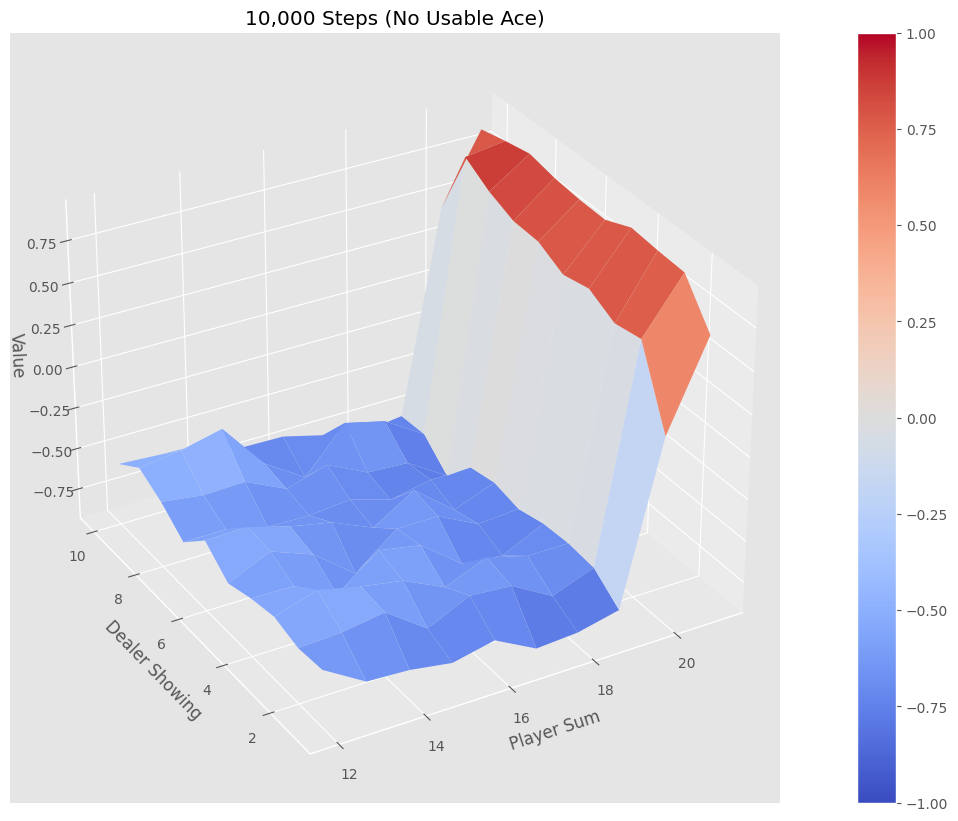

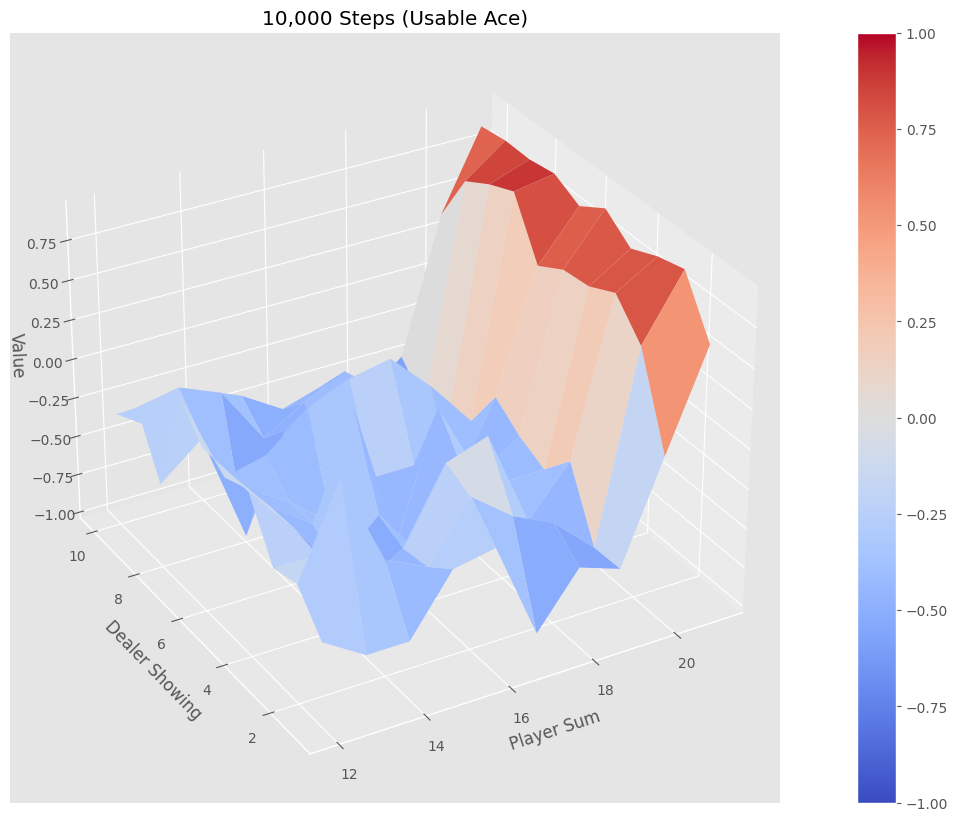

CPU times: total: 1.36 s
Wall time: 1.42 s


In [7]:
%%time

# 執行重要性加權抽樣的蒙地卡羅策略評估，使用目標策略sample_policy進行10000回合模擬
# sample_policy：目標策略函式，用於決定行動
# env：環境物件
# num_episodes：執行的回合數(預設10000)

# 傳回估計的狀態價值函數(Value Function)
V_10k = policy_eval(sample_policy, env, num_episodes = 10000)

# 顯示最佳值函數的3D圖表，會產生兩個圖：
# 1.玩家手牌點數與莊家明牌對應的預期最大回報，無可用Ace時的值函數(10,000 Steps (No Usable Ace))
# 2.有可用Ace時的值函數，展現較高的期望回報與不同策略價值(10,000 Steps (Usable Ace))

# 繪製值函數V的3D圖表，標題為"10,000 Steps"
plotting.plot_value_function(V_10k, title="10,000 Steps")